<a href="https://colab.research.google.com/github/MounicaSrinivasan163/Trip_Fare_Prediction_Project/blob/main/TripFare___Predicting_Urban_Taxi_Fare_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [ ]:
# import pandas as pd

# good_data = []
# bad_rows = []

# # Read in chunks to handle large files
# chunksize = 10000  # Adjust based on available memory

# with pd.read_csv("/content/drive/MyDrive/taxi_fare.csv", chunksize=chunksize, on_bad_lines='warn') as reader:
#     for chunk in reader:
#         good_data.append(chunk)

# # Combine all good chunks
# df = pd.concat(good_data, ignore_index=True)


In [ ]:
# df.shape

In [ ]:
# df.columns

In [ ]:
# import pandas as pd
# import geopandas as gpd

# # --- Step 1: Load your taxi fare dataset ---
# df = pd.read_csv("/content/drive/MyDrive/taxi_fare.csv")

# # --- Step 2: Load the NYC neighborhood shapefile ---
# nta_shapes = gpd.read_file("/content/NYC_NTA.geojson").to_crs(epsg=4326)

# # --- Step 3: Convert pickup and dropoff coordinates into GeoDataFrames ---
# pickup_gdf = gpd.GeoDataFrame(
#     df,
#     geometry=gpd.points_from_xy(df["pickup_longitude"], df["pickup_latitude"]),
#     crs="EPSG:4326"
# )

# dropoff_gdf = gpd.GeoDataFrame(
#     df,
#     geometry=gpd.points_from_xy(df["dropoff_longitude"], df["dropoff_latitude"]),
#     crs="EPSG:4326"
# )

# # --- Step 4: Spatial join to map coordinates to neighborhood names ---
# pickup_with_area = gpd.sjoin(pickup_gdf, nta_shapes, how="left", predicate="within")
# dropoff_with_area = gpd.sjoin(dropoff_gdf, nta_shapes, how="left", predicate="within")

# # --- Step 5: Add neighborhood names back to your original DataFrame ---
# df["pickup_area"] = pickup_with_area["ntaname"]
# df["dropoff_area"] = dropoff_with_area["ntaname"]

# # --- Step 6: Save results or view ---
# df.to_csv("taxi_fare_with_areas.csv", index=False)
# print(df[["pickup_area", "dropoff_area"]].head())


In [ ]:
import pandas as pd

good_data = []
bad_rows = []

# Read in chunks to handle large files
chunksize = 10000  # Adjust based on available memory

with pd.read_csv("/content/drive/MyDrive/taxi_fare_with_areas.csv", chunksize=chunksize, on_bad_lines='warn') as reader:
    for chunk in reader:
        good_data.append(chunk)

# Combine all good chunks
df = pd.concat(good_data, ignore_index=True)


In [ ]:
df.info() #check the data-types of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               212345 non-null  int64  
 1   tpep_pickup_datetime   212345 non-null  object 
 2   tpep_dropoff_datetime  212345 non-null  object 
 3   passenger_count        212345 non-null  int64  
 4   pickup_longitude       212345 non-null  float64
 5   pickup_latitude        212345 non-null  float64
 6   RatecodeID             212345 non-null  int64  
 7   store_and_fwd_flag     212345 non-null  object 
 8   dropoff_longitude      212345 non-null  float64
 9   dropoff_latitude       212345 non-null  float64
 10  payment_type           212345 non-null  int64  
 11  fare_amount            212345 non-null  float64
 12  extra                  212345 non-null  float64
 13  mta_tax                212345 non-null  float64
 14  tip_amount             212345 non-nu

In [ ]:
df.duplicated().sum() #check duplicates

np.int64(0)

In [ ]:
df.isna().sum() #check null values

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
RatecodeID,0
store_and_fwd_flag,0
dropoff_longitude,0
dropoff_latitude,0


In [ ]:
df[df['pickup_area'].isna() & df['dropoff_area'].isna()]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_area,dropoff_area
95,2,2016-03-01 00:00:31,2016-03-01 00:09:06,1,-74.651306,40.609261,1,N,-74.651306,40.609261,1,6.5,0.5,0.5,1.00,0.00,0.3,8.80,NaN,NaN
116,2,2016-03-01 00:00:41,2016-03-01 00:11:39,1,0.000000,0.000000,1,N,0.000000,0.000000,1,12.0,0.5,0.5,3.32,0.00,0.3,16.62,NaN,NaN
365,2,2016-03-10 07:08:29,2016-03-10 07:32:55,2,0.000000,0.000000,1,N,0.000000,0.000000,1,28.0,0.0,0.5,10.30,5.54,0.3,44.64,NaN,NaN
478,2,2016-03-10 07:09:15,2016-03-10 07:40:06,1,0.000000,0.000000,3,N,0.000000,0.000000,1,66.0,0.0,0.0,16.36,15.50,0.3,98.16,NaN,NaN
491,2,2016-03-10 07:09:20,2016-03-10 07:17:52,5,0.000000,0.000000,1,N,0.000000,0.000000,1,8.0,0.0,0.5,1.76,0.00,0.3,10.56,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212064,1,2016-03-01 12:14:46,2016-03-01 12:35:16,1,0.000000,0.000000,1,N,0.000000,0.000000,3,15.0,0.0,0.5,0.00,0.00,0.3,15.80,NaN,NaN
212086,1,2016-03-01 12:14:50,2016-03-01 12:20:57,1,0.000000,0.000000,1,N,0.000000,0.000000,2,5.5,0.0,0.5,0.00,0.00,0.3,6.30,NaN,NaN
212209,1,2016-03-01 12:15:13,2016-03-01 12:28:19,1,0.000000,0.000000,1,N,0.000000,0.000000,2,10.5,0.0,0.5,0.00,0.00,0.3,11.30,NaN,NaN
212228,1,2016-03-01 12:15:16,2016-03-01 12:20:09,1,0.000000,0.000000,1,N,0.000000,0.000000,1,6.0,0.0,0.5,1.35,0.00,0.3,8.15,NaN,NaN


In [ ]:
df=df[~(df['pickup_area'].isna() & df['dropoff_area'].isna())]  #ignore the rows which dont have both pickup and dropoff
df.isna().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
RatecodeID,0
store_and_fwd_flag,0
dropoff_longitude,0
dropoff_latitude,0


In [ ]:
df['pickup_area'].mode()[0],df["dropoff_area"].mode()[0]

('Midtown-Times Square', 'Midtown-Times Square')

In [ ]:
df["pickup_area"].fillna(df['pickup_area'].mode()[0],inplace=True)
df["dropoff_area"].fillna(df["dropoff_area"].mode()[0],inplace=True)

In [ ]:
df.isna().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
RatecodeID,0
store_and_fwd_flag,0
dropoff_longitude,0
dropoff_latitude,0


In [ ]:
df.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000
mean,1.709933,1.768208,-73.865231,40.694668,1.031789,-73.895162,40.709734,1.324465,12.635228,0.048057,0.497863,1.806771,0.329290,0.299653,15.616850
std,0.453794,1.471253,2.815917,1.549438,0.487446,2.409147,1.327415,0.477787,10.693738,0.147794,0.035986,2.480230,2.033278,0.013834,13.416007
min,1.000000,0.000000,-74.184555,0.000000,1.000000,-74.640816,0.000000,1.000000,-52.000000,-0.500000,-0.500000,-2.340000,0.000000,-0.300000,-52.800000
25%,1.000000,1.000000,-73.990982,40.740952,1.000000,-73.990694,40.740719,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.000000,1.000000,-73.979736,40.756130,1.000000,-73.978867,40.755714,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.620000
75%,2.000000,2.000000,-73.963921,40.770458,1.000000,-73.965591,40.767689,2.000000,14.500000,0.000000,0.500000,2.360000,0.000000,0.300000,17.160000
max,2.000000,6.000000,0.000000,42.786934,99.000000,0.000000,42.666893,4.000000,819.500000,1.000000,0.500000,218.950000,661.080000,0.300000,832.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210072 entries, 0 to 212344
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               210072 non-null  int64  
 1   tpep_pickup_datetime   210072 non-null  object 
 2   tpep_dropoff_datetime  210072 non-null  object 
 3   passenger_count        210072 non-null  int64  
 4   pickup_longitude       210072 non-null  float64
 5   pickup_latitude        210072 non-null  float64
 6   RatecodeID             210072 non-null  int64  
 7   store_and_fwd_flag     210072 non-null  object 
 8   dropoff_longitude      210072 non-null  float64
 9   dropoff_latitude       210072 non-null  float64
 10  payment_type           210072 non-null  int64  
 11  fare_amount            210072 non-null  float64
 12  extra                  210072 non-null  float64
 13  mta_tax                210072 non-null  float64
 14  tip_amount             210072 non-null  f

In [ ]:
# Convert and assign back, skipping bad entries
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210072 entries, 0 to 212344
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               210072 non-null  int64         
 1   tpep_pickup_datetime   210072 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  210072 non-null  datetime64[ns]
 3   passenger_count        210072 non-null  int64         
 4   pickup_longitude       210072 non-null  float64       
 5   pickup_latitude        210072 non-null  float64       
 6   RatecodeID             210072 non-null  int64         
 7   store_and_fwd_flag     210072 non-null  object        
 8   dropoff_longitude      210072 non-null  float64       
 9   dropoff_latitude       210072 non-null  float64       
 10  payment_type           210072 non-null  int64         
 11  fare_amount            210072 non-null  float64       
 12  extra                  210072 non-null  float64  

In [ ]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_area,dropoff_area
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,Midtown-Times Square,Chelsea-Hudson Yards
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,Upper West Side-Lincoln Square,West Village
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,John F. Kennedy International Airport,Park Slope
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,LaGuardia Airport,East Midtown-Turtle Bay
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,Upper West Side (Central),Midtown-Times Square
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16,Upper East Side-Carnegie Hill,East Midtown-Turtle Bay
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30,Tribeca-Civic Center,Murray Hill-Kips Bay
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80,Greenwich Village,Greenwich Village
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80,Upper West Side (Central),Upper East Side-Carnegie Hill


In [ ]:
df['tpep_pickup_datetime'].isna().sum(),df['tpep_pickup_datetime'].isna().sum()

(np.int64(0), np.int64(0))

## Feature Engineering

In [ ]:
# Step 1: Localize the naive datetime to UTC
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].dt.tz_localize('UTC')

# Step 2: Convert to US/Eastern
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].dt.tz_convert('US/Eastern')

In [ ]:
# Step 1: Localize the naive datetime to UTC
df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].dt.tz_localize('UTC')

# Step 2: Convert to US/Eastern
df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].dt.tz_convert('US/Eastern')

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_area,dropoff_area
0,1,2016-02-29 19:00:00-05:00,2016-02-29 19:07:55-05:00,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,Midtown-Times Square,Chelsea-Hudson Yards
1,1,2016-02-29 19:00:00-05:00,2016-02-29 19:11:06-05:00,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,Upper West Side-Lincoln Square,West Village
2,2,2016-02-29 19:00:00-05:00,2016-02-29 19:31:06-05:00,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,John F. Kennedy International Airport,Park Slope
3,2,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,LaGuardia Airport,East Midtown-Turtle Bay
4,2,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,Upper West Side (Central),Midtown-Times Square


In [ ]:
df['Day'] = df['tpep_pickup_datetime'].dt.day
df['Month'] = df['tpep_pickup_datetime'].dt.month
df['Year'] = df['tpep_pickup_datetime'].dt.year


In [ ]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].dt.total_seconds()
df['duration']

,duration
0,475.0
1,666.0
2,1866.0
3,0.0
4,0.0
...,...
212340,1396.0
212341,1365.0
212342,161.0
212343,429.0


In [ ]:
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['is_Weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [ ]:
df['Day'].unique()

array([29, 10,  1], dtype=int32)

In [ ]:
df['day_of_week'].unique()

array([0, 3, 1], dtype=int32)

In [ ]:
df['hour'] = df['tpep_pickup_datetime'].dt.hour

In [ ]:
df['hour'].unique()

array([19,  2,  3,  4,  5,  6,  7,  8, 20, 21, 22, 23,  0,  1,  9],
      dtype=int32)

In [ ]:
df['am/pm'] = df['hour'].apply(lambda x: 'am' if x < 12 else 'pm')

In [ ]:
df['is_late_night']=df['hour'].apply(lambda x: 1 if x>=22 or x<=5 else 0)

In [ ]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers

    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c


In [ ]:
df['trip_distance_km'] = haversine(df['pickup_latitude'], df['pickup_longitude'],
                                   df['dropoff_latitude'], df['dropoff_longitude'])
df['trip_distance_km']=df['trip_distance_km'].round(2)

In [ ]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'pickup_area',
       'dropoff_area', 'Day', 'Month', 'Year', 'duration', 'day_of_week',
       'is_Weekend', 'hour', 'am/pm', 'is_late_night', 'trip_distance_km'],
      dtype='object')

In [ ]:
# df.drop(["tpep_pickup_datetime","tpep_dropoff_datetime"],axis=1,inplace=True)

## Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210072 entries, 0 to 212344
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype                     
---  ------                 --------------   -----                     
 0   VendorID               210072 non-null  int64                     
 1   tpep_pickup_datetime   210072 non-null  datetime64[ns, US/Eastern]
 2   tpep_dropoff_datetime  210072 non-null  datetime64[ns, US/Eastern]
 3   passenger_count        210072 non-null  int64                     
 4   pickup_longitude       210072 non-null  float64                   
 5   pickup_latitude        210072 non-null  float64                   
 6   RatecodeID             210072 non-null  int64                     
 7   store_and_fwd_flag     210072 non-null  object                    
 8   dropoff_longitude      210072 non-null  float64                   
 9   dropoff_latitude       210072 non-null  float64                   
 10  payment_type           21

In [ ]:
df.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,...,total_amount,Day,Month,Year,duration,day_of_week,is_Weekend,hour,is_late_night,trip_distance_km
count,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,210072.000000,...,210072.000000,210072.000000,210072.000000,210072.0,210072.000000,210072.000000,210072.0,210072.000000,210072.000000,210072.000000
mean,1.709933,1.768208,-73.865231,40.694668,1.031789,-73.895162,40.709734,1.324465,12.635228,0.048057,...,15.616850,6.793918,2.917238,2016.0,969.955639,1.689811,0.0,5.722414,0.644303,24.974551
std,0.453794,1.471253,2.815917,1.549438,0.487446,2.409147,1.327415,0.477787,10.693738,0.147794,...,13.416007,7.912364,0.275523,0.0,3370.393590,1.073347,0.0,4.873676,0.478725,433.421878
min,1.000000,0.000000,-74.184555,0.000000,1.000000,-74.640816,0.000000,1.000000,-52.000000,-0.500000,...,-52.800000,1.000000,2.000000,2016.0,-430475.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,1.000000,1.000000,-73.990982,40.740952,1.000000,-73.990694,40.740719,1.000000,6.500000,0.000000,...,8.300000,1.000000,3.000000,2016.0,404.000000,1.000000,0.0,3.000000,0.000000,1.180000
50%,2.000000,1.000000,-73.979736,40.756130,1.000000,-73.978867,40.755714,1.000000,9.500000,0.000000,...,11.620000,1.000000,3.000000,2016.0,677.000000,1.000000,0.0,4.000000,1.000000,1.960000
75%,2.000000,2.000000,-73.963921,40.770458,1.000000,-73.965591,40.767689,2.000000,14.500000,0.000000,...,17.160000,10.000000,3.000000,2016.0,1099.000000,3.000000,0.0,6.000000,1.000000,3.600000
max,2.000000,6.000000,0.000000,42.786934,99.000000,0.000000,42.666893,4.000000,819.500000,1.000000,...,832.800000,29.000000,3.000000,2016.0,86363.000000,3.000000,0.0,23.000000,1.000000,8667.950000


In [ ]:
df['Year'].value_counts()

,count
Year,
2016,210072


In [ ]:
df.drop('Year',axis=1,inplace=True)

In [ ]:
df['Month'].value_counts()

,count
Month,
3,192686
2,17386


In [ ]:
df['am/pm'].value_counts(),df['is_late_night'].value_counts(),df['day_of_week'].value_counts(),df['is_Weekend'].value_counts()

(am/pm
 am    192686
 pm     17386
 Name: count, dtype: int64,
 is_late_night
 1    135350
 0     74722
 Name: count, dtype: int64,
 day_of_week
 1    111538
 3     81148
 0     17386
 Name: count, dtype: int64,
 is_Weekend
 0    210072
 Name: count, dtype: int64)

### Univariate Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210072 entries, 0 to 212344
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype                     
---  ------                 --------------   -----                     
 0   VendorID               210072 non-null  int64                     
 1   tpep_pickup_datetime   210072 non-null  datetime64[ns, US/Eastern]
 2   tpep_dropoff_datetime  210072 non-null  datetime64[ns, US/Eastern]
 3   passenger_count        210072 non-null  int64                     
 4   pickup_longitude       210072 non-null  float64                   
 5   pickup_latitude        210072 non-null  float64                   
 6   RatecodeID             210072 non-null  int64                     
 7   store_and_fwd_flag     210072 non-null  object                    
 8   dropoff_longitude      210072 non-null  float64                   
 9   dropoff_latitude       210072 non-null  float64                   
 10  payment_type           21

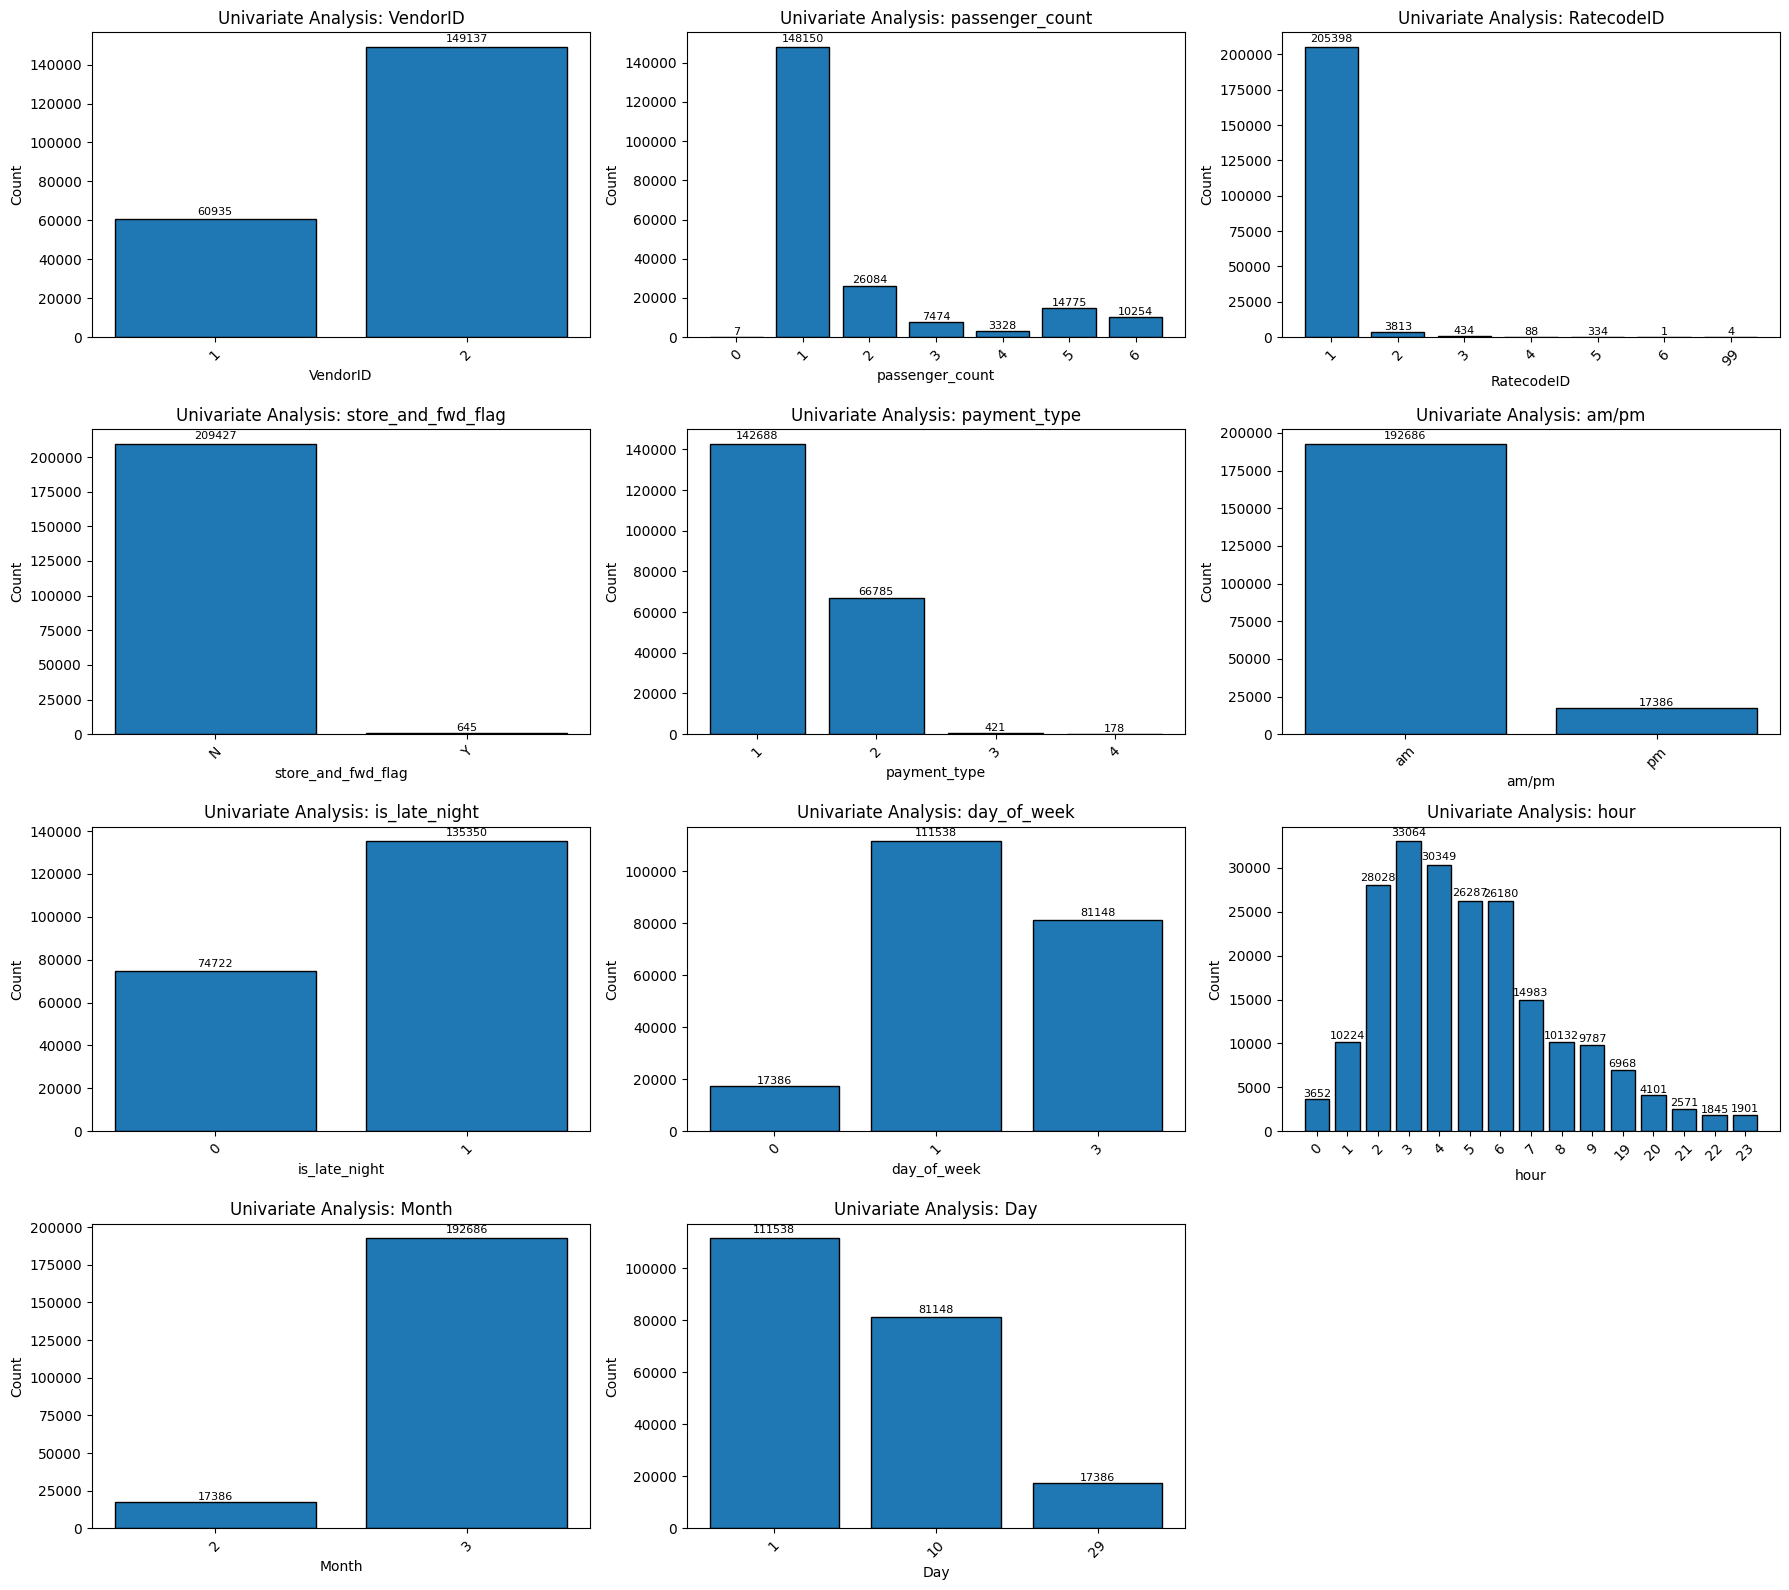

In [ ]:
import matplotlib.pyplot as plt

# List of categorical columns in your dataset
categorical_columns = [
    'VendorID', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag',
    'payment_type', 'am/pm', 'is_late_night',
    'day_of_week', 'hour', 'Month', 'Day'
]

def plot_categorical_univariate(df, columns):
    n_cols = 3
    n_rows = (len(columns) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        ax = axes[i]
        value_counts = df[col].value_counts().sort_index()

        bars = ax.bar(value_counts.index.astype(str), value_counts.values, edgecolor='black')

        # Add value labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height + height*0.01, f'{int(height)}',
                    ha='center', va='bottom', fontsize=8)

        ax.set_title(f'Univariate Analysis: {col}', fontsize=12)
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel('Count', fontsize=10)
        ax.tick_params(axis='x', rotation=45)

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Call the function
plot_categorical_univariate(df, categorical_columns)


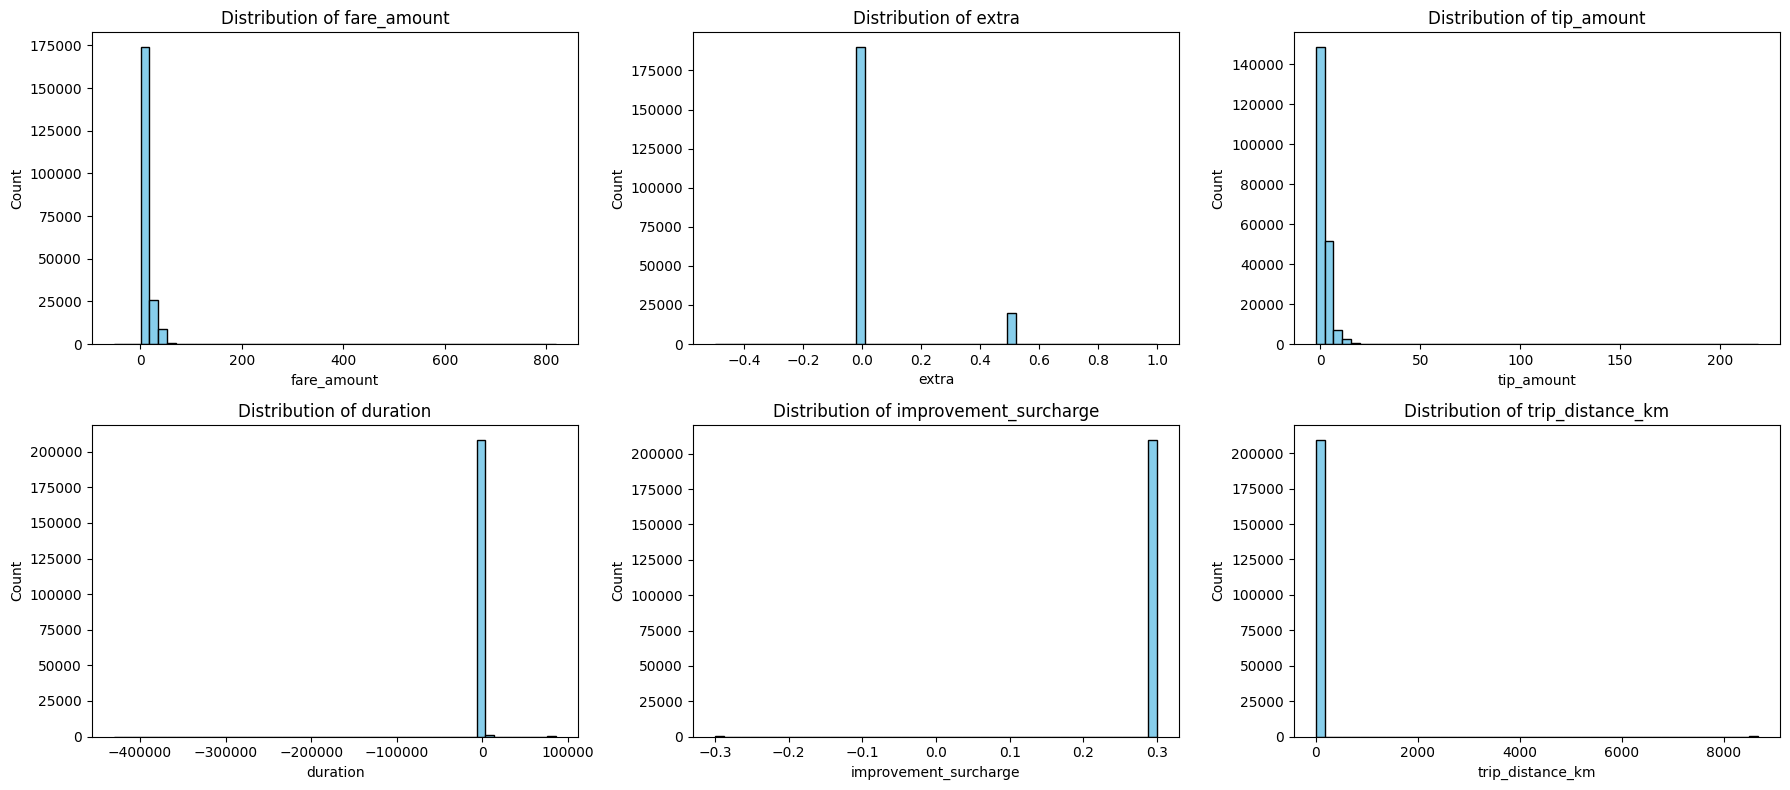

In [ ]:
import matplotlib.pyplot as plt

continuous_cols =  ['fare_amount','extra', 'tip_amount','duration','improvement_surcharge','trip_distance_km' ]

# Plot settings
n_cols = 3
n_rows = (len(continuous_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(continuous_cols):
    axes[i].hist(df[col], bins=50, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Hide extra axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'pickup_area',
       'dropoff_area', 'Day', 'Month', 'duration', 'day_of_week', 'is_Weekend',
       'hour', 'am/pm', 'is_late_night', 'trip_distance_km'],
      dtype='object')

### Bivariate Analysis

In [ ]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'pickup_area',
       'dropoff_area', 'Day', 'Month', 'duration', 'day_of_week', 'is_Weekend',
       'hour', 'am/pm', 'is_late_night', 'trip_distance_km'],
      dtype='object')

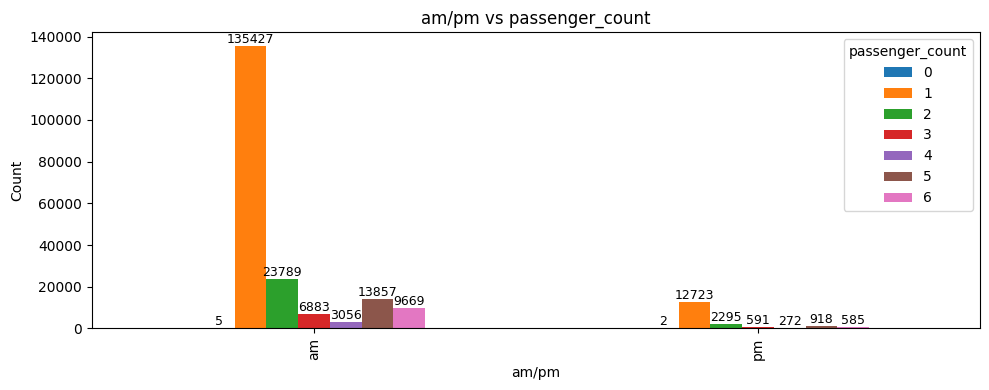

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create cross-tabulation
cross_tab = pd.crosstab(df['am/pm'], df['passenger_count'])

# Plot
ax = cross_tab.plot(kind='bar', figsize=(10, 4))
plt.title('am/pm vs passenger_count')
plt.xlabel('am/pm')
plt.ylabel('Count')
plt.legend(title='passenger_count')

# Annotate bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()


In [ ]:
cross_tab

passenger_count,0,1,2,3,4,5,6
am/pm,,,,,,,
am,5,135427,23789,6883,3056,13857,9669
pm,2,12723,2295,591,272,918,585


In [ ]:
cross_tab = pd.crosstab(df['passenger_count'],df['is_late_night'])
cross_tab

is_late_night,0,1
passenger_count,,
0,2,5
1,50497,97653
2,10222,15862
3,2937,4537
4,1350,1978
5,5742,9033
6,3972,6282


In [ ]:
cross_tab = pd.crosstab(df['store_and_fwd_flag'],df['is_late_night'])
cross_tab

is_late_night,0,1
store_and_fwd_flag,,
N,74549,134878
Y,173,472


In [ ]:
cross_tab = pd.crosstab(df['RatecodeID'],df['payment_type'])
cross_tab

payment_type,1,2,3,4
RatecodeID,,,,
1,139185,65659,382,172
2,2851,943,18,1
3,337,83,10,4
4,50,37,1,0
5,262,62,9,1
6,0,0,1,0
99,3,1,0,0


In [ ]:
# there cant be passenger_count be 0, can be considered as logical outliers, hence can be removed
df = df[df['passenger_count'] != 0]

In [ ]:
pivot = df.pivot_table(index='is_late_night', values='fare_amount', aggfunc='mean')
pivot

,fare_amount
is_late_night,
0,13.340015
1,12.245935


In [ ]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'pickup_area',
       'dropoff_area', 'Day', 'Month', 'duration', 'day_of_week', 'is_Weekend',
       'hour', 'am/pm', 'is_late_night', 'trip_distance_km'],
      dtype='object')

In [ ]:
df['other_charges']=df['extra']+df['mta_tax']+df['improvement_surcharge']+df['tip_amount']+df['tolls_amount']

In [ ]:
#Average percentage of othercharges w.r.t the base fare charged:

df['other_charges'].sum()/df['total_amount'].sum()*100

#we infer 19% on an average other charges is being charged on the whole

np.float64(19.092474387563342)

In [ ]:
pivot = df.pivot_table(
    index='is_late_night',
    values=['total_amount','other_charges','extra'],
    aggfunc='mean'
)

pivot

,extra,other_charges,total_amount
is_late_night,,,
0,0.088919,3.080131,16.420135
1,0.025501,2.927227,15.173150


In [ ]:
pivot = df.pivot_table(
    index='am/pm',
    values=['total_amount','other_charges','extra'],
    aggfunc='mean'
)

pivot

,extra,other_charges,total_amount
am/pm,,,
am,0.008654,2.956159,15.475282
pm,0.484814,3.263766,17.184175


In [ ]:

pivot = df.pivot_table(
    index='RatecodeID',
    values=['total_amount','other_charges','extra'],
    aggfunc='mean'
)

pivot

,extra,other_charges,total_amount
RatecodeID,,,
1,0.048981,2.731744,14.424365
2,0.000000,13.085597,65.030391
3,0.062212,24.927696,89.750276
4,0.090909,8.794886,82.948295
5,0.000000,11.359576,71.418939
6,0.000000,0.800000,3.300000
99,0.000000,0.800000,3.300000


In [ ]:

pivot = df.pivot_table(
    index='passenger_count',
    values=['total_amount','other_charges','extra'],
    aggfunc='mean'
)

pivot

,extra,other_charges,total_amount
passenger_count,,,
1,0.050466,2.965837,15.483493
2,0.047980,3.063051,16.233238
3,0.044421,2.970698,15.802333
4,0.046124,2.833978,15.485871
5,0.034924,3.061180,15.922805
6,0.035693,2.943644,15.439061


## Outliers Handling

In [ ]:
df.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,...,total_amount,Day,Month,duration,day_of_week,is_Weekend,hour,is_late_night,trip_distance_km,other_charges
count,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,...,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.0,210065.000000,210065.000000,210065.000000,210065.000000
mean,1.709947,1.768267,-73.865227,40.694667,1.030314,-73.896216,40.710315,1.324466,12.635099,0.048059,...,15.616702,6.793845,2.917245,969.799638,1.689844,0.0,5.722305,0.644301,24.851591,2.981615
std,0.453788,1.471242,2.815964,1.549463,0.316608,2.392947,1.318491,0.477788,10.693555,0.147796,...,13.415693,7.912149,0.275513,3370.166594,1.073347,0.0,4.873521,0.478726,432.197399,3.726052
min,1.000000,1.000000,-74.184555,0.000000,1.000000,-74.640816,0.000000,1.000000,-52.000000,-0.500000,...,-52.800000,1.000000,2.000000,-430475.000000,0.000000,0.0,0.000000,0.000000,0.000000,-3.140000
25%,1.000000,1.000000,-73.990982,40.740952,1.000000,-73.990692,40.740719,1.000000,6.500000,0.000000,...,8.300000,1.000000,3.000000,404.000000,1.000000,0.0,3.000000,0.000000,1.180000,0.800000
50%,2.000000,1.000000,-73.979736,40.756130,1.000000,-73.978867,40.755714,1.000000,9.500000,0.000000,...,11.620000,1.000000,3.000000,677.000000,1.000000,0.0,4.000000,1.000000,1.960000,2.260000
75%,2.000000,2.000000,-73.963921,40.770458,1.000000,-73.965591,40.767689,2.000000,14.500000,0.000000,...,17.160000,10.000000,3.000000,1099.000000,3.000000,0.0,6.000000,1.000000,3.600000,3.300000
max,2.000000,6.000000,0.000000,42.786934,99.000000,0.000000,42.666893,4.000000,819.500000,1.000000,...,832.800000,29.000000,3.000000,86363.000000,3.000000,0.0,23.000000,1.000000,8667.950000,661.880000


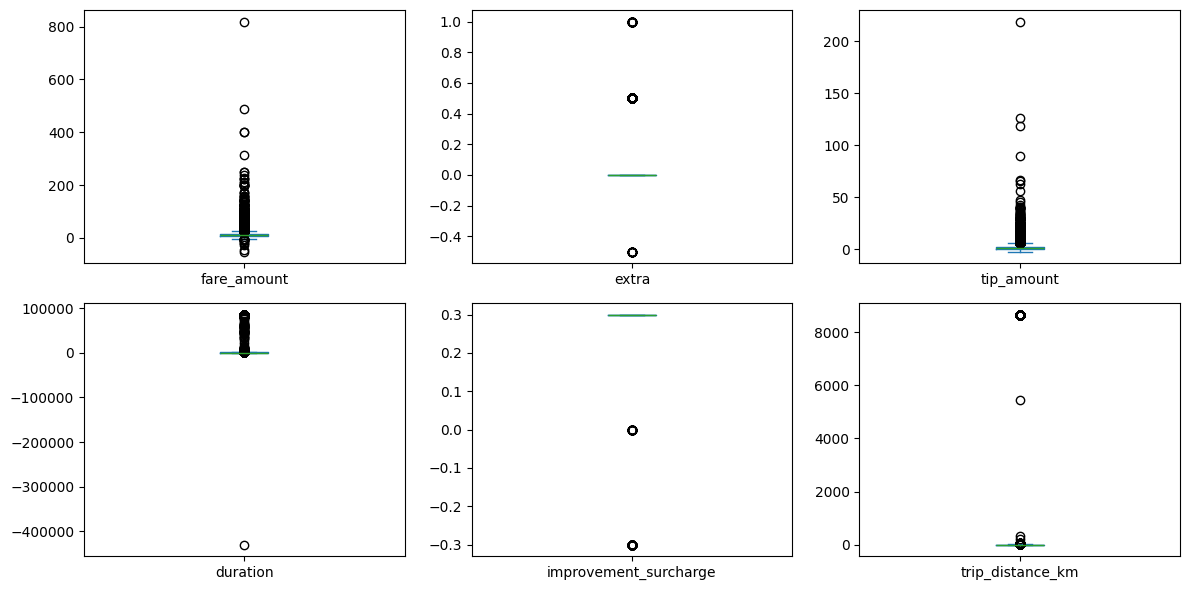

In [ ]:
continuous_cols = [
    'fare_amount', 'extra', 'tip_amount', 'duration',
    'improvement_surcharge', 'trip_distance_km'
]

df[continuous_cols].plot(kind='box', subplots=True, layout=(2, 3), figsize=(12, 6))
plt.tight_layout()
plt.show()


In [ ]:
df.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,...,total_amount,Day,Month,duration,day_of_week,is_Weekend,hour,is_late_night,trip_distance_km,other_charges
count,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,...,210065.000000,210065.000000,210065.000000,210065.000000,210065.000000,210065.0,210065.000000,210065.000000,210065.000000,210065.000000
mean,1.709947,1.768267,-73.865227,40.694667,1.030314,-73.896216,40.710315,1.324466,12.635099,0.048059,...,15.616702,6.793845,2.917245,969.799638,1.689844,0.0,5.722305,0.644301,24.851591,2.981615
std,0.453788,1.471242,2.815964,1.549463,0.316608,2.392947,1.318491,0.477788,10.693555,0.147796,...,13.415693,7.912149,0.275513,3370.166594,1.073347,0.0,4.873521,0.478726,432.197399,3.726052
min,1.000000,1.000000,-74.184555,0.000000,1.000000,-74.640816,0.000000,1.000000,-52.000000,-0.500000,...,-52.800000,1.000000,2.000000,-430475.000000,0.000000,0.0,0.000000,0.000000,0.000000,-3.140000
25%,1.000000,1.000000,-73.990982,40.740952,1.000000,-73.990692,40.740719,1.000000,6.500000,0.000000,...,8.300000,1.000000,3.000000,404.000000,1.000000,0.0,3.000000,0.000000,1.180000,0.800000
50%,2.000000,1.000000,-73.979736,40.756130,1.000000,-73.978867,40.755714,1.000000,9.500000,0.000000,...,11.620000,1.000000,3.000000,677.000000,1.000000,0.0,4.000000,1.000000,1.960000,2.260000
75%,2.000000,2.000000,-73.963921,40.770458,1.000000,-73.965591,40.767689,2.000000,14.500000,0.000000,...,17.160000,10.000000,3.000000,1099.000000,3.000000,0.0,6.000000,1.000000,3.600000,3.300000
max,2.000000,6.000000,0.000000,42.786934,99.000000,0.000000,42.666893,4.000000,819.500000,1.000000,...,832.800000,29.000000,3.000000,86363.000000,3.000000,0.0,23.000000,1.000000,8667.950000,661.880000


In [ ]:
# Continuous columns
continuous_cols = [
    'fare_amount', 'extra', 'tip_amount', 'duration',
    'improvement_surcharge', 'trip_distance_km'
]

df_iqr = df.copy()

for col in continuous_cols:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only non-outlier rows for this column
    df= df_iqr[(df_iqr[col] >= lower_bound) & (df_iqr[col] <= upper_bound)]



In [ ]:
df=df[df['trip_distance_km']!=0] #oulier in trip_distance

In [ ]:
df=df[df['total_amount']<200] #outlier in total_amount

## Other Insights

### Demographics of data

In [ ]:
df['is_peak_time'] = df['hour'].apply(lambda x: 1 if x >= 2 and x <=6 else 0 )


In [ ]:
df['trip_length'] = df['trip_distance_km'].apply(lambda x : 'short' if x <1 else ('mid' if x < 4  else 'long'))

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ---------- Data Prep ----------

# 1. Total amount share by am/pm - bar
total_by_ampm = df.groupby('am/pm')['total_amount'].sum()

# 2. Total amount share by payment_type - bar
total_by_payment = df.groupby('payment_type')['total_amount'].sum()

# 3. Fare components share in total_amount - donut
fare_components = ['fare_amount', 'extra', 'mta_tax', 'tip_amount',
                   'tolls_amount', 'improvement_surcharge']
components_sum = df[fare_components].sum()

# 4. Trip distance share by is_peak_time - donut
distance_by_peak = df.groupby('is_peak_time')['trip_distance_km'].sum()

# 5. Passenger count by trip_length - bar
passenger_by_length = df.groupby('trip_length')['passenger_count'].sum()

# 6. Trip count by passenger_count - bar
trip_count_by_passenger = df['passenger_count'].value_counts()

# ---------- Subplots Setup ----------
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=[
        "Total Amount by AM/PM",
        "Total Amount by Payment Type",
        "Fare Components Share",
        "Trip Distance Share by Peak Time",
        "Passenger Count by Trip Length",
        "Trip Count by Passenger Count"
    ],
    specs=[[{"type": "bar"}, {"type": "bar"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "bar"}, {"type": "bar"}]]
)

# ---------- Add Traces ----------

# 1. Total amount share by am/pm - bar
fig.add_trace(
    go.Bar(x=total_by_ampm.index, y=total_by_ampm.values, text=total_by_ampm.values, textposition='auto'),
    row=1, col=1
)

# 2. Total amount share by payment_type - bar
fig.add_trace(
    go.Bar(x=total_by_payment.index, y=total_by_payment.values, text=total_by_payment.values, textposition='auto'),
    row=1, col=2
)

# 3. Fare components share - donut
fig.add_trace(
    go.Pie(labels=components_sum.index, values=components_sum.values, hole=0.4, textinfo='percent'),
    row=1, col=3
)

# 4. Trip distance share by is_peak_time - donut
fig.add_trace(
    go.Pie(labels=distance_by_peak.index, values=distance_by_peak.values, hole=0.4, textinfo='percent'),
    row=2, col=1
)

# 5. Passenger count by trip_length - bar
fig.add_trace(
    go.Bar(x=passenger_by_length.index, y=passenger_by_length.values, text=passenger_by_length.values, textposition='auto'),
    row=2, col=2
)

# 6. Trip count by passenger_count - bar
fig.add_trace(
    go.Bar(x=trip_count_by_passenger.index, y=trip_count_by_passenger.values, text=trip_count_by_passenger.values, textposition='auto'),
    row=2, col=3
)

# ---------- Layout ----------
fig.update_layout(
    height=800, width=1100,
    title_text="Taxi Trip Metrics Dashboard",
    showlegend=False

)

fig.show()


### Exploring how fare per km and fare per minute behave across different time periods or trip lengths.

In [ ]:
# fare_per_km column for each trip
df['fare_per_km'] = df['total_amount'] / df['trip_distance_km']


In [ ]:
# Pivot table: mean fare/km for each group
pivot = pd.pivot_table(
    data=df,
    index='trip_length',
    columns='am/pm',
    values='fare_per_km',
    aggfunc='mean'
)

pivot

am/pm,am,pm
trip_length,,
long,4.223247,3.569614
mid,6.176045,5.145917
short,22.818998,48.327102


In [ ]:
pd.pivot_table( data=df, index='trip_length', columns='am/pm', values='trip_distance_km', aggfunc='mean')


am/pm,am,pm
trip_length,,
long,5.240845,5.413172
mid,2.040290,2.239821
short,0.712008,0.660696


In [ ]:
df['trip_length'].value_counts()

,count
trip_length,
mid,125922
short,36956
long,25003


In [ ]:
pd.crosstab(df['trip_length'], df['am/pm'], margins=True)

am/pm,am,pm,All
trip_length,,,
long,21346,3657,25003
mid,117855,8067,125922
short,34757,2199,36956
All,173958,13923,187881


### Visualizing trip counts by pickup hour and pickup day to identify peak demand periods.

In [ ]:
# flag Peak time
df['hour'].value_counts().reset_index().sort_values(by='hour',ascending=True)

# we see that hour 2 - 6 is the peak time >25K+ datarows

,hour,count
11,0,2892
6,1,8933
2,2,25488
0,3,30443
1,4,27725
3,5,23788
4,6,23774
5,7,13529
7,8,8863
8,9,8523


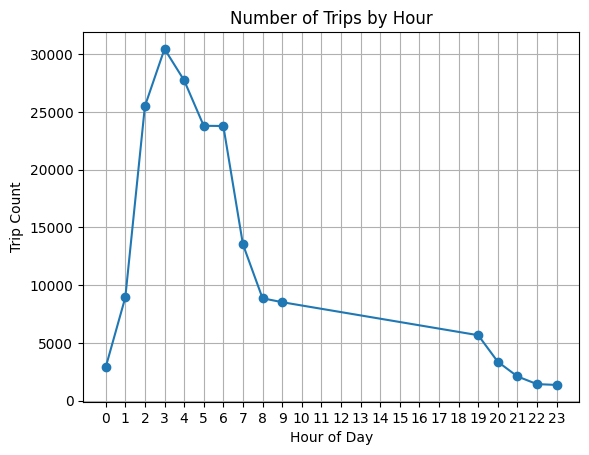

In [ ]:
import matplotlib.pyplot as plt

# Get counts per hour
hour_counts = df['hour'].value_counts().reset_index()
hour_counts.columns = ['hour', 'count']  # rename columns
hour_counts = hour_counts.sort_values(by='hour', ascending=True)

# Line plot
plt.plot(hour_counts['hour'], hour_counts['count'], marker='o')
plt.title('Number of Trips by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Trip Count')
plt.xticks(range(0, 24))  # ensure all hours 0-23 are shown
plt.grid(True)
plt.show()


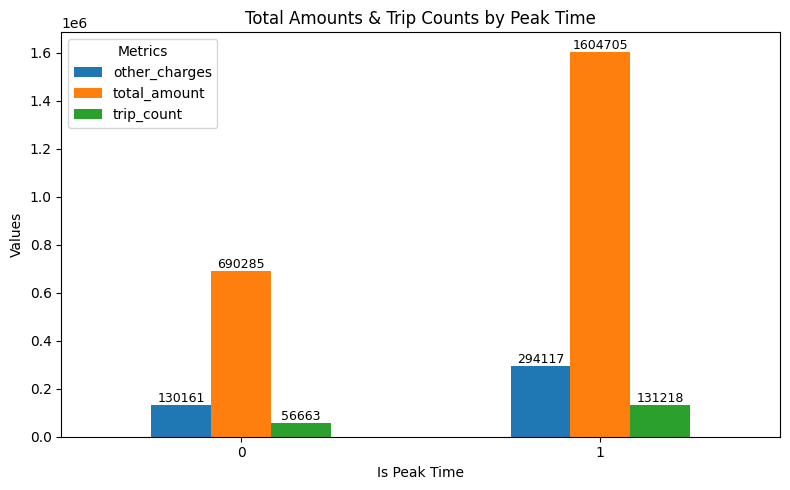

In [ ]:
import matplotlib.pyplot as plt

# Your pivot table
pivot = df.pivot_table(
    index='is_peak_time',
    values=['total_amount', 'other_charges'],
    aggfunc='sum'
)
trip_counts = df.groupby('is_peak_time').size().rename('trip_count')
pivot = pivot.join(trip_counts)

# Plot
ax = pivot.plot(kind='bar', figsize=(8, 5))
plt.title('Total Amounts & Trip Counts by Peak Time')
plt.xlabel('Is Peak Time')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.legend(title='Metrics')

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'pickup_area',
       'dropoff_area', 'Day', 'Month', 'duration', 'day_of_week', 'is_Weekend',
       'hour', 'am/pm', 'is_late_night', 'trip_distance_km', 'other_charges',
       'is_peak_time', 'trip_length', 'fare_per_km'],
      dtype='object')

In [ ]:
# import folium
# from folium.plugins import HeatMap

# # --- Pickup Heatmap ---
# pickup_map = folium.Map(location=[df['pickup_latitude'].mean(), df['pickup_longitude'].mean()], zoom_start=12)
# pickup_points = df[['pickup_latitude', 'pickup_longitude']].dropna().values.tolist()
# HeatMap(pickup_points, radius=8, blur=6).add_to(pickup_map)

# pickup_map.save("pickup_heatmap.html")

# # --- Dropoff Heatmap ---
# dropoff_map = folium.Map(location=[df['dropoff_latitude'].mean(), df['dropoff_longitude'].mean()], zoom_start=12)
# dropoff_points = df[['dropoff_latitude', 'dropoff_longitude']].dropna().values.tolist()
# HeatMap(dropoff_points, radius=8, blur=6).add_to(dropoff_map)

# dropoff_map.save("dropoff_heatmap.html")


In [ ]:
# import pandas as pd
# import plotly.graph_objects as go

# # Step 1: Filter for late night, single passenger, long trips
# df_pm = df[(df['is_late_night'] == 1) &
#            (df['passenger_count'] == 1) &
#            (df['trip_length'] == 'long')]

# # Step 2: Group by drop-off coordinates and count trips
# df_trip_counts = (
#     df_pm.groupby(['dropoff_latitude', 'dropoff_longitude'])
#          .size()
#          .reset_index(name='trip_count')
# )

# # Step 3: (Optional) Calculate mean trip count
# mean_trip_count = df_trip_counts['trip_count'].mean()
# print(f"Mean trip count per drop-off location: {mean_trip_count}")

# # Step 4: Create Scattermapbox
# fig = go.Figure(go.Scattermapbox(
#     lat=df_trip_counts['dropoff_latitude'],
#     lon=df_trip_counts['dropoff_longitude'],
#     mode='markers',
#     marker=go.scattermapbox.Marker(
#         size=df_trip_counts['trip_count'] / df_trip_counts['trip_count'].max() * 20,
#         color=df_trip_counts['trip_count'],
#         colorscale='Viridis',
#         showscale=True,
#         colorbar=dict(title="Trip Count")
#     ),
#     text=df_trip_counts['trip_count'],
#     hovertemplate='Lat: %{lat}<br>Lon: %{lon}<br>Trips: %{text}<extra></extra>'
# ))

# # Step 5: Mapbox layout
# fig.update_layout(
#     mapbox=dict(
#         style='open-street-map',
#         center=dict(lat=df_trip_counts['dropoff_latitude'].mean(),
#                     lon=df_trip_counts['dropoff_longitude'].mean()),
#         zoom=11
#     ),
#     margin=dict(l=0, r=0, t=0, b=0),
#     title="Late Night Long Trips (1 Passenger) by Drop-off Location"
# )

# fig.show()


In [ ]:
df.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'pickup_area',
       'dropoff_area', 'Day', 'Month', 'duration', 'day_of_week', 'is_Weekend',
       'hour', 'am/pm', 'is_late_night', 'trip_distance_km', 'other_charges',
       'is_peak_time', 'trip_length', 'fare_per_km'],
      dtype='object')

In [ ]:
# df.drop('is_peak_time',
#        'trip_length', 'fare_per_km','is_Weekend',)

In [ ]:
# import pandas as pd
# import geopandas as gpd
# import folium
# import numpy as np

# # Filter trips
# df_filtered = df[
#     (df['is_late_night'] == 1) &
#     (df['passenger_count'] == 1) &
#     (df['trip_length'] == 'long')
# ].copy()

# # Create GeoDataFrame for pickups
# gdf_points = gpd.GeoDataFrame(
#     df_filtered,
#     geometry=gpd.points_from_xy(df_filtered['pickup_longitude'], df_filtered['pickup_latitude']),
#     crs="EPSG:4326"
# )

# # Load neighborhoods GeoJSON
# geojson_path = "nyc_neighborhoods.geojson"
# neighborhoods = gpd.read_file(geojson_path)

# # Spatial join to assign neighborhood to each pickup
# gdf_joined = gpd.sjoin(gdf_points, neighborhoods, how="left", predicate="within")

# # Aggregate trip counts
# trip_counts = gdf_joined.groupby('NTAName').size().reset_index(name='trip_count')

# # Compute threshold scale for choropleth to balance gradient
# max_count = trip_counts['trip_count'].max()
# threshold_scale = list(np.linspace(0, max_count, 7))  # 7 color bins from 0 to max

# # Create map
# m = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# # Add choropleth
# choropleth = folium.Choropleth(
#     geo_data=geojson_path,
#     data=trip_counts,
#     columns=['NTAName', 'trip_count'],
#     key_on='feature.properties.NTAName',
#     fill_color='YlOrRd',
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     legend_name='Late Night Long Trips (Count)',
#     threshold_scale=threshold_scale,
#     reset=True
# ).add_to(m)

# # Add tooltip for neighborhoods with counts
# choropleth.geojson.add_child(
#     folium.features.GeoJsonTooltip(['NTAName'], labels=False)
# )

# # Save map
# m.save("late_night_long_trips.html")


## Handling Skewness

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187881 entries, 0 to 212343
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype                     
---  ------                 --------------   -----                     
 0   VendorID               187881 non-null  int64                     
 1   tpep_pickup_datetime   187881 non-null  datetime64[ns, US/Eastern]
 2   tpep_dropoff_datetime  187881 non-null  datetime64[ns, US/Eastern]
 3   passenger_count        187881 non-null  int64                     
 4   pickup_longitude       187881 non-null  float64                   
 5   pickup_latitude        187881 non-null  float64                   
 6   RatecodeID             187881 non-null  int64                     
 7   store_and_fwd_flag     187881 non-null  object                    
 8   dropoff_longitude      187881 non-null  float64                   
 9   dropoff_latitude       187881 non-null  float64                   
 10  payment_type           18

In [ ]:
df.isna().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
RatecodeID,0
store_and_fwd_flag,0
dropoff_longitude,0
dropoff_latitude,0


In [ ]:
cols = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'total_amount', 'duration',
    'trip_distance_km']


In [ ]:
for i in cols:
  print(i,df[i].skew())

fare_amount 2.1071845916618726
extra 2.91124017893062
mta_tax -35.457367512146995
tip_amount 5.252391165745941
tolls_amount 17.523132817237002
improvement_surcharge -43.72913265250619
total_amount 2.329480181845783
duration 25.808047421326258
trip_distance_km 1.225011638137302


In [ ]:
for i in cols:
  print(i,df[i].kurtosis())

fare_amount 15.372149723123599
extra 6.620925919159395
mta_tax 1330.6070784200094
tip_amount 258.79780189239415
tolls_amount 376.22861778864325
improvement_surcharge 1928.0037915385997
total_amount 17.908391211500902
duration 680.7435556442692
trip_distance_km 0.9882158298509047


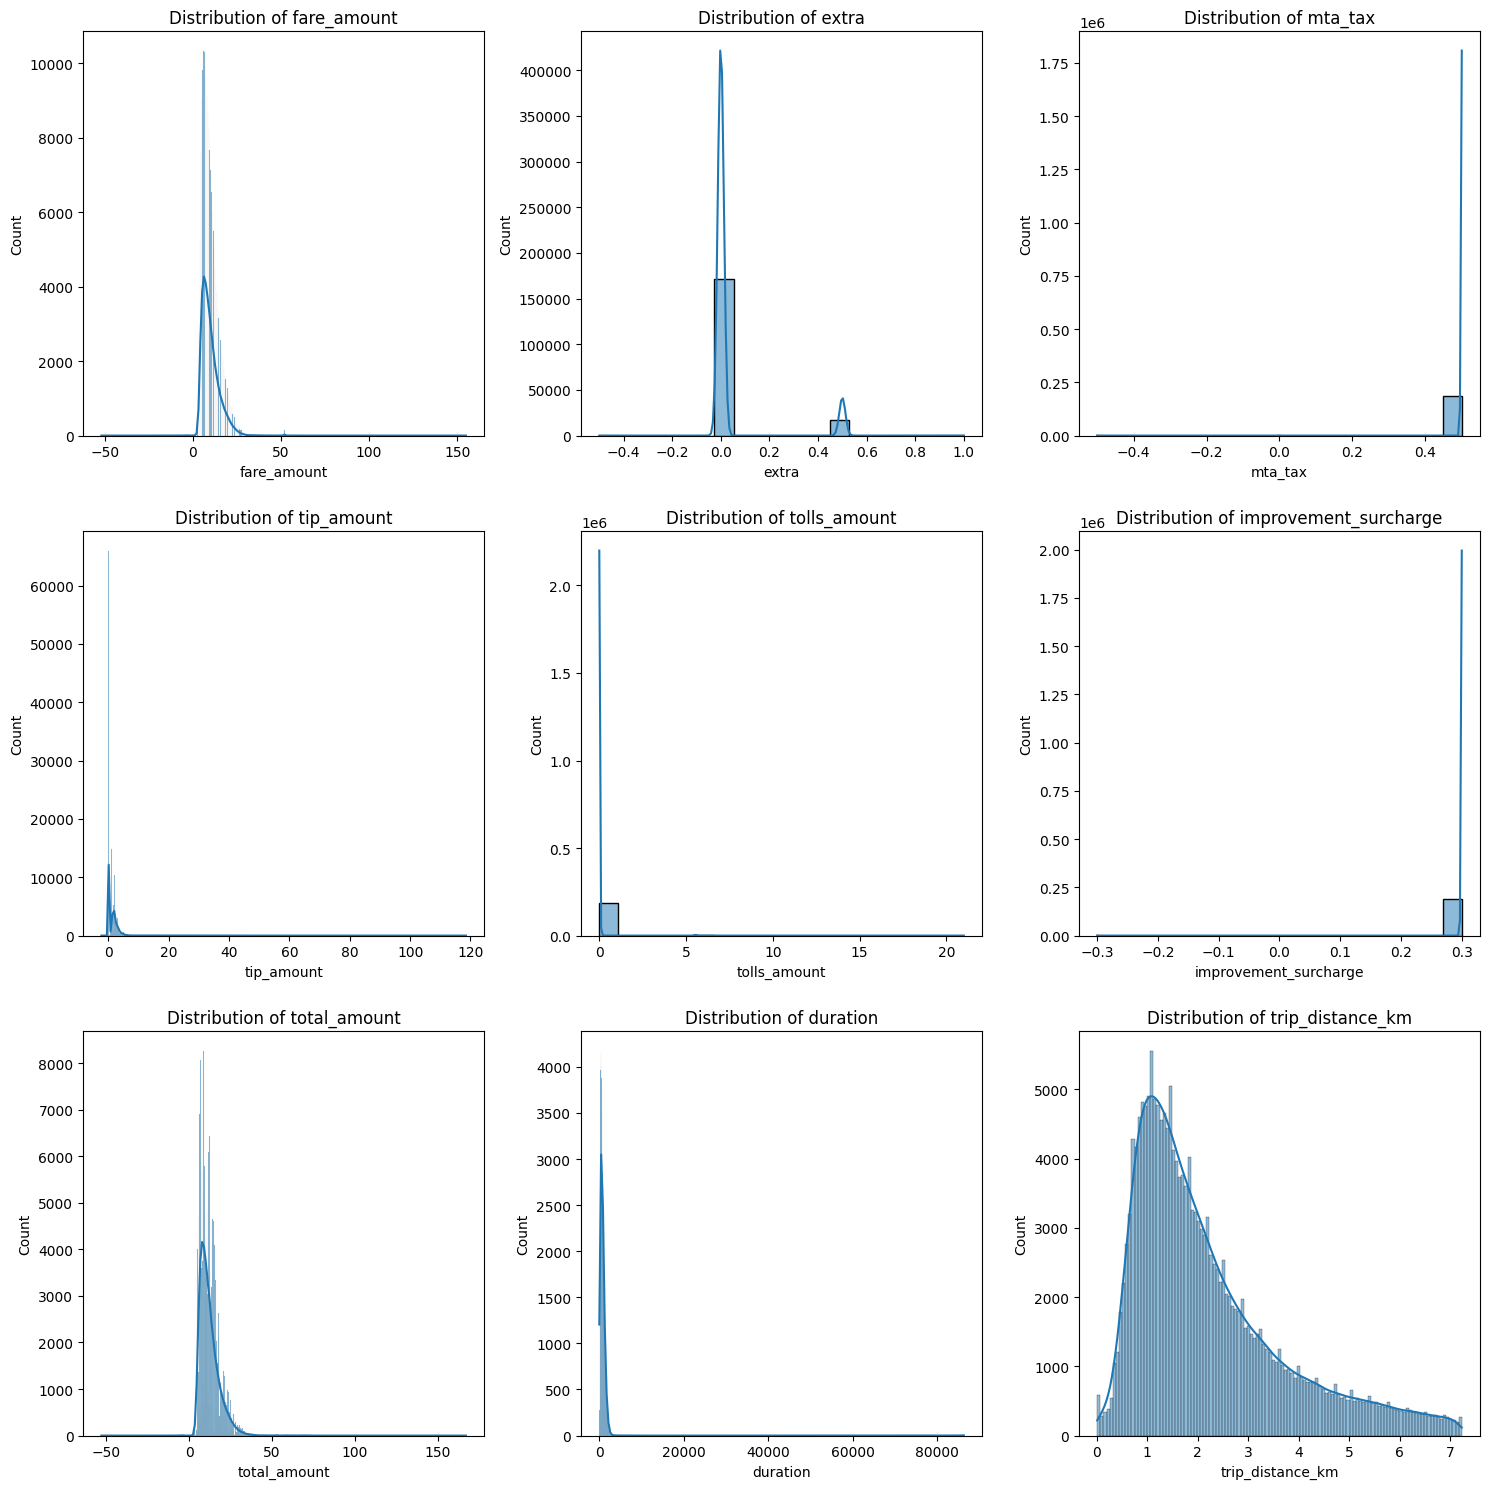

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'total_amount', 'duration',
    'trip_distance_km'
]

n_cols = 3  # 3 plots per row
n_rows = (len(cols) + n_cols - 1) // n_cols  # calculate rows needed

plt.figure(figsize=(15, 5 * n_rows))  # width, height depends on rows

for i, col in enumerate(cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True)  # distplot deprecated, use histplot + kde
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


In [ ]:
## FIND OPTIMAL LAMBDA TO FIX SKEWNESS AND KURTOSIS:
from scipy.stats import boxcox

for i in cols:
  if df[i].skew() < 0.5 and df[i].skew() > -0.5 and df[i].kurtosis() < 3 and df[i].kurtosis() > -3:
    continue
  print(i)
  method = [0,0.5,-0.5,-1,1,2,-2]
  for j in method:
    print(j)
    print("skewness",pd.DataFrame(boxcox(df[i],lmbda=j)).skew().values,"Kurtosis",pd.DataFrame(boxcox(df[i],lmbda=j)).kurtosis().values)
  print("---------------------------------")

fare_amount
0
skewness [nan] Kurtosis [nan]
0.5
skewness [0.85465529] Kurtosis [1.64262853]
-0.5
skewness [nan] Kurtosis [nan]
-1
skewness [nan] Kurtosis [nan]
1
skewness [2.14865656] Kurtosis [15.30702189]
2
skewness [24.1530192] Kurtosis [1967.39224148]
-2
skewness [nan] Kurtosis [nan]
---------------------------------
extra
0
skewness [nan] Kurtosis [nan]
0.5
skewness [2.90477233] Kurtosis [6.4461679]
-0.5
skewness [nan] Kurtosis [nan]
-1
skewness [nan] Kurtosis [nan]
1
skewness [2.91978218] Kurtosis [6.62198601]
2
skewness [3.17296105] Kurtosis [11.32260927]
-2
skewness [nan] Kurtosis [nan]
---------------------------------
mta_tax
0
skewness [nan] Kurtosis [nan]
0.5
skewness [-40.91160566] Kurtosis [1671.77728216]
-0.5
skewness [nan] Kurtosis [nan]
-1
skewness [nan] Kurtosis [nan]
1
skewness [-40.91160566] Kurtosis [1671.77728216]
2
skewness [-40.91160566] Kurtosis [1671.77728216]
-2
skewness [nan] Kurtosis [nan]
---------------------------------
tip_amount
0
skewness [nan] Kurtos

In [ ]:
# # From the above results we have found the optimal Lambda for these cols

# 'fare_amount' - lambda -> 0.5
# 'extra' - lambda -> 0.5
# 'mta_tax' - lambda -> 0.5
# 'tip_amount' - lambda -> 1
# 'tolls_amount'- lambda -> 0.5
# 'improvement_surcharge' -lambda
# 'total_amount'- lambda -> 0.5
# 'duration' - lambda -> 0.5
# 'trip_distance_km' - lambda -> 0

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox

# Columns and their desired lambda values
lambda_map = {
    'fare_amount': 0.5,
    'extra': 0.5,
    'mta_tax': 0.5,
    'tolls_amount': 0.5,
    'improvement_surcharge': 0.5,
    'total_amount': 0.5,
    'duration': 0.5,
    'tip_amount': 1,
    'trip_distance_km': 0
}

# Apply Box-Cox safely
for col, lmbda in lambda_map.items():
    min_val = df[col].min()

    # Shift only if needed
    if min_val <= 0:
        shift = abs(min_val) + 1
        print(f"Shifting {col} by {shift} to make values positive.")
        transformed = boxcox(df[col] + shift, lmbda=lmbda)
    else:
        transformed = boxcox(df[col], lmbda=lmbda)

    df[col] = transformed


Shifting fare_amount by 53.0 to make values positive.
Shifting extra by 1.5 to make values positive.
Shifting mta_tax by 1.5 to make values positive.
Shifting tolls_amount by 1.0 to make values positive.
Shifting improvement_surcharge by 1.3 to make values positive.
Shifting total_amount by 53.8 to make values positive.
Shifting duration by 1.0 to make values positive.
Shifting tip_amount by 3.34 to make values positive.


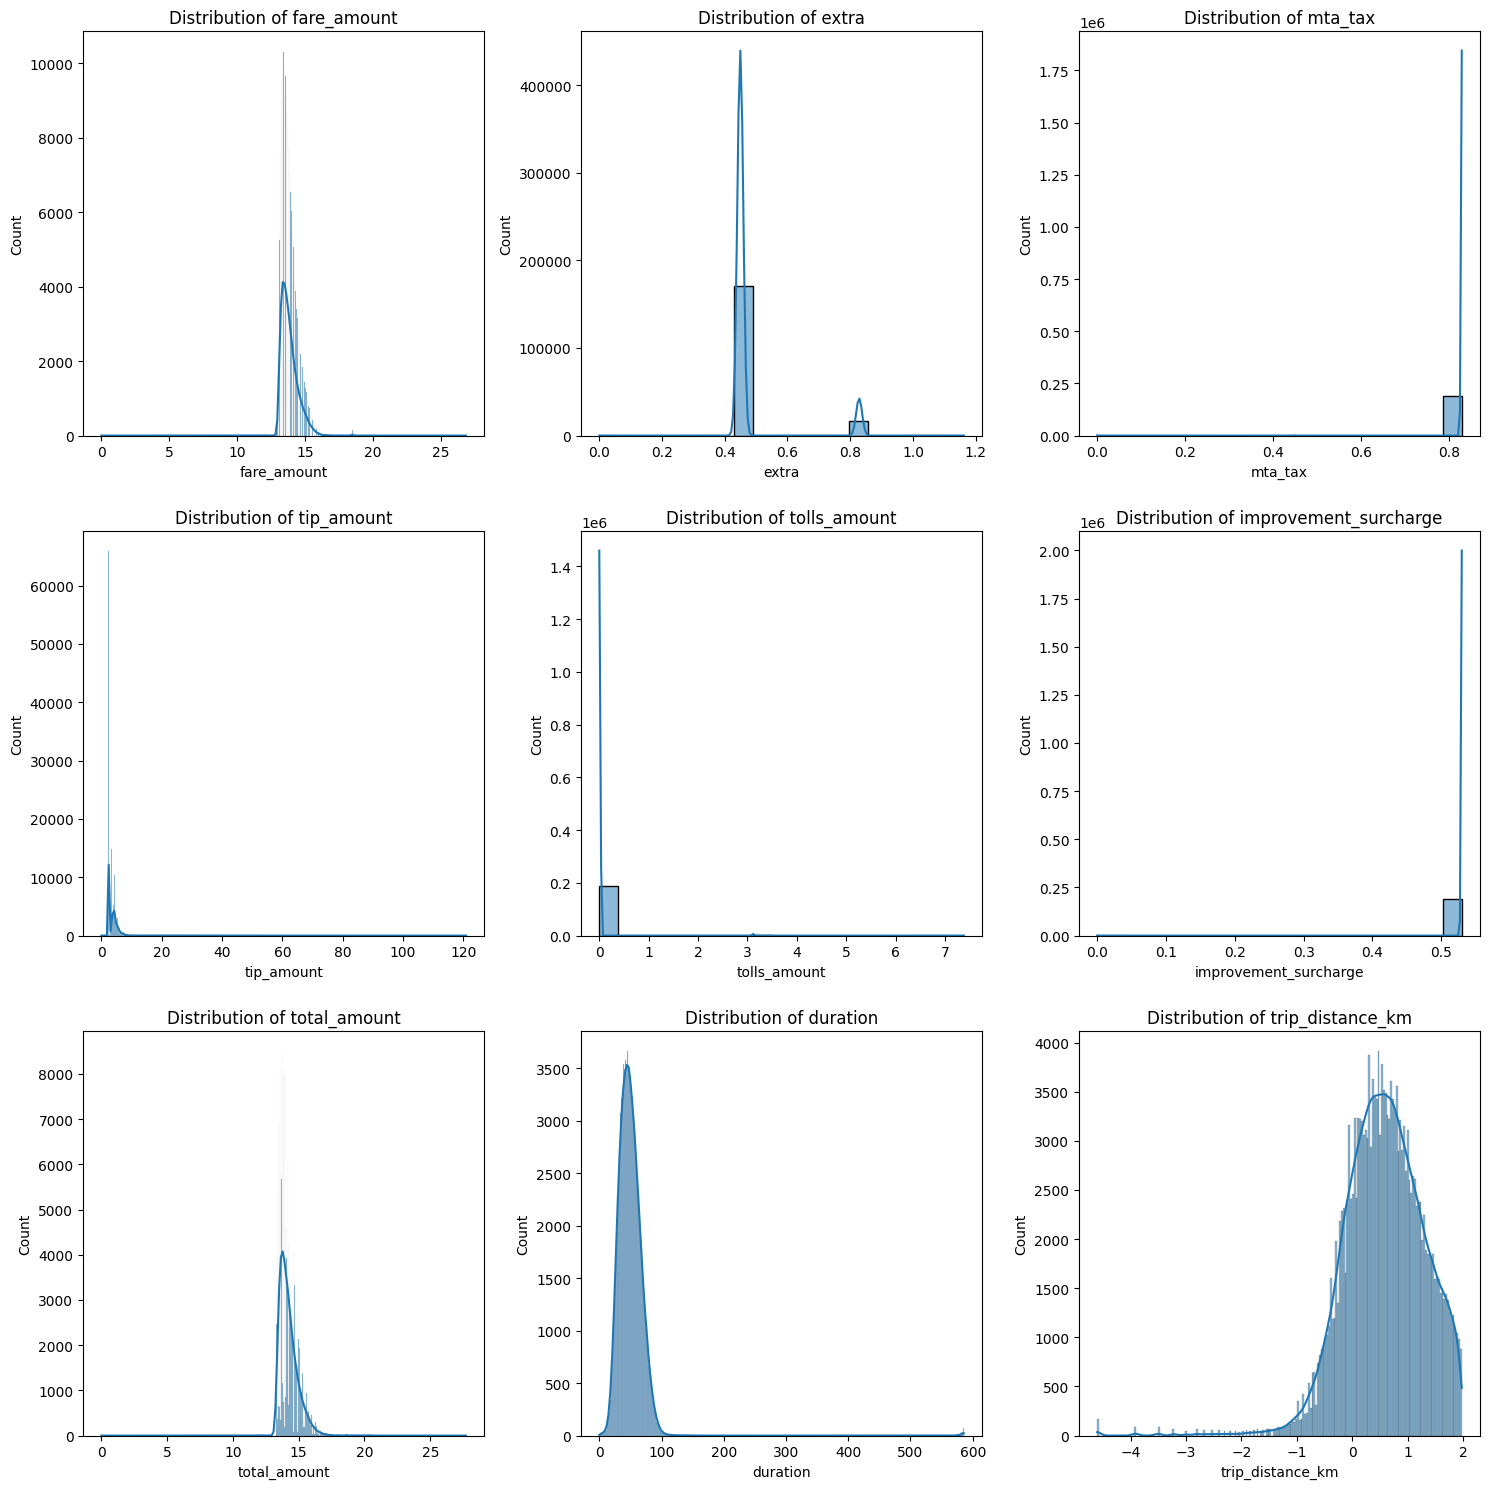

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'total_amount', 'duration',
    'trip_distance_km'
]

n_cols = 3  # 3 plots per row
n_rows = (len(cols) + n_cols - 1) // n_cols  # calculate rows needed

plt.figure(figsize=(15, 5 * n_rows))  # width, height depends on rows

for i, col in enumerate(cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True)  # distplot deprecated, use histplot + kde
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


## Encode Categorical Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187881 entries, 0 to 212343
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype                     
---  ------                 --------------   -----                     
 0   VendorID               187881 non-null  int64                     
 1   tpep_pickup_datetime   187881 non-null  datetime64[ns, US/Eastern]
 2   tpep_dropoff_datetime  187881 non-null  datetime64[ns, US/Eastern]
 3   passenger_count        187881 non-null  int64                     
 4   pickup_longitude       187881 non-null  float64                   
 5   pickup_latitude        187881 non-null  float64                   
 6   RatecodeID             187881 non-null  int64                     
 7   store_and_fwd_flag     187881 non-null  object                    
 8   dropoff_longitude      187881 non-null  float64                   
 9   dropoff_latitude       187881 non-null  float64                   
 10  payment_type           18

In [ ]:
df.drop(['trip_length','am/pm',
       'is_late_night','tpep_dropoff_datetime','tpep_pickup_datetime'],axis=1,inplace=True)

In [ ]:
df.store_and_fwd_flag.unique()

array(['N', 'Y'], dtype=object)

In [ ]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['pickup_area'] = le.fit_transform(df['pickup_area'])
df['dropoff_area'] = le.fit_transform(df['dropoff_area'])


## Correlation Analysis

In [ ]:
df.isna().sum()

,0
VendorID,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
RatecodeID,0
store_and_fwd_flag,0
dropoff_longitude,0
dropoff_latitude,0
payment_type,0
fare_amount,0


In [ ]:
df.columns

Index(['VendorID', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'RatecodeID', 'store_and_fwd_flag', 'dropoff_longitude',
       'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'pickup_area', 'dropoff_area', 'Day', 'Month', 'duration',
       'day_of_week', 'is_Weekend', 'hour', 'trip_distance_km',
       'other_charges', 'is_peak_time', 'fare_per_km'],
      dtype='object')

In [ ]:
df.corr()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,...,Day,Month,duration,day_of_week,is_Weekend,hour,trip_distance_km,other_charges,is_peak_time,fare_per_km
VendorID,1.000000,0.280189,-0.002034,0.009353,-0.007293,-0.079451,-0.018095,0.008334,-0.009801,0.033525,...,0.167802,0.128599,0.059107,0.496591,NaN,-0.023936,-0.007473,-0.000752,-0.040985,-0.002581
passenger_count,0.280189,1.000000,-0.003294,0.003702,-0.004342,-0.022348,-0.004793,0.002405,0.000229,0.011432,...,0.055054,0.028505,0.020331,0.138601,NaN,0.003714,-0.002930,-0.000951,-0.013432,-0.000653
pickup_longitude,-0.002034,-0.003294,1.000000,0.460093,0.021162,0.006206,0.637304,0.276444,0.082010,0.028990,...,-0.005366,-0.000995,-0.020860,-0.010339,NaN,-0.012958,-0.000212,-0.017161,0.000711,0.039483
pickup_latitude,0.009353,0.003702,0.460093,1.000000,-0.014170,-0.003851,0.253552,0.649160,0.039199,-0.075926,...,-0.083746,0.096540,-0.026606,0.037808,NaN,-0.089175,-0.042458,-0.067956,0.049065,-0.019335
RatecodeID,-0.007293,-0.004342,0.021162,-0.014170,1.000000,0.001718,0.014799,-0.014044,0.006193,0.070539,...,0.008540,-0.011436,-0.002049,-0.006682,NaN,0.010167,-0.027301,0.055513,-0.005850,0.131807
store_and_fwd_flag,-0.079451,-0.022348,0.006206,-0.003851,0.001718,1.000000,0.010238,-0.001081,0.008932,0.003327,...,-0.008771,-0.014975,-0.002966,-0.040626,NaN,0.009042,0.002855,0.001320,0.001689,0.004464
dropoff_longitude,-0.018095,-0.004793,0.637304,0.253552,0.014799,0.010238,1.000000,0.445381,0.098908,0.020304,...,0.089556,-0.113302,-0.031111,-0.058316,NaN,0.092297,0.011337,-0.017862,-0.069116,0.037710
dropoff_latitude,0.008334,0.002405,0.276444,0.649160,-0.014044,-0.001081,0.445381,1.000000,0.043925,-0.149477,...,-0.072920,0.086445,-0.072750,0.037157,NaN,-0.077536,-0.089023,-0.099695,0.026318,-0.017394
payment_type,-0.009801,0.000229,0.082010,0.039199,0.006193,0.008932,0.098908,0.043925,1.000000,-0.084613,...,0.047512,-0.051895,-0.052812,-0.016339,NaN,0.071309,-0.114121,-0.604438,-0.067469,0.003500
fare_amount,0.033525,0.011432,0.028990,-0.075926,0.070539,0.003327,0.020304,-0.149477,-0.084613,1.000000,...,0.018626,0.012235,0.561098,0.051498,NaN,0.028354,0.706145,0.473596,0.010452,0.134740


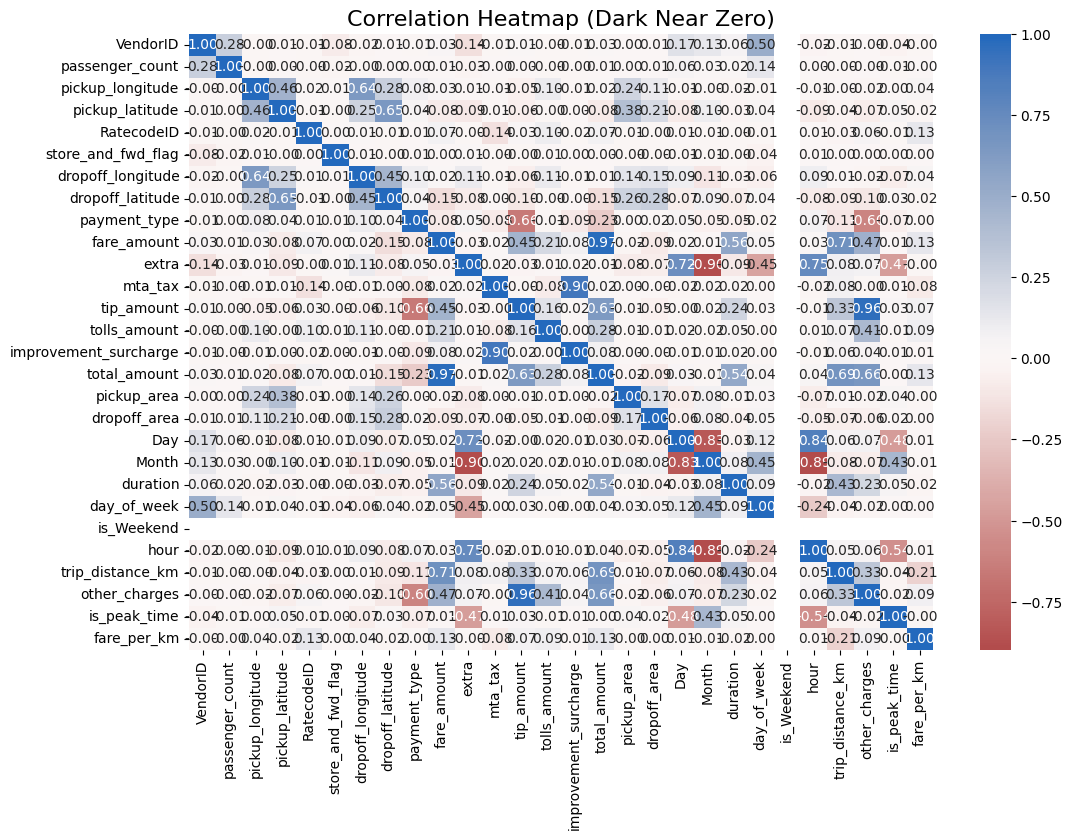

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="vlag_r",   # Dark around 0, light at -1 and 1
    center=0,
    cbar=True
)
plt.title("Correlation Heatmap (Dark Near Zero)", fontsize=16)
plt.show()


In [ ]:
df.drop("is_Weekend",axis=1,inplace=True)

## Statistical Analysis

In [ ]:
from scipy import stats


In [ ]:
continuous = [
    'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
    'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'total_amount', 'duration', 'trip_distance_km'
]

categories = [
    'VendorID', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag',
    'payment_type', 'Day', 'Month', 'day_of_week', 'hour'
]


In [ ]:
#TWO SAMPLE T - TEST : continuous vs continuous
def two_sample(d1,d2):
  t=0
  f=0
  for i in  range(31):
    sample1=d1.sample(frac=0.03)
    sample2=d2.sample(frac=0.03)
    t_test,p_value=stats.ttest_ind(sample1,sample2)
    if p_value < 0.05:
      f=f+1
    else:
      t=t+1
  if t>f:
    return True
  else:
    return False


In [ ]:
#CHI-SQUARE TEST - category vs category
def chisquare_cat_vs_cat(d1,d2):
    return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1] < 0.05 else False

In [ ]:
#ANNOVA TEST - continious vs category
def annova_test(d1,d2):
    group= df[d2].unique()
    data = {}
    for i in group:
        data[i]=df[d1][df[d2]==i]
    f_value,p_value=stats.f_oneway(*[i for i in data.values()])
    return False if p_value < 0.05 else True

In [ ]:
#All the statistical test being done across all the columns
final = {}
for i in df.columns:
    final[i]={}
    for j in df.columns:
        if (i in continuous) and (j in continuous):
            result=two_sample(df[i],df[j])
        elif (i in continuous) and (j in categories):
            result=annova_test(i,j)
        elif (i in categories) and (j in continuous):
            result=annova_test(j,i)
        elif (i in categories) and (j in categories):
            result=chisquare_cat_vs_cat(df[i],df[j])
        if result:
            final[i][j]=1
        else:
            final[i][j]=0

In [ ]:
#The result of the statistical test which was in a dictionary is put into a dataframe
final_df = pd.DataFrame(final)
final_df

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,...,dropoff_area,Day,Month,duration,day_of_week,hour,trip_distance_km,other_charges,is_peak_time,fare_per_km
VendorID,1,1,1,0,1,1,0,0,1,0,...,0,1,1,0,1,1,0,1,1,1
passenger_count,1,1,0,1,0,1,0,1,1,0,...,0,1,1,0,1,1,1,1,1,1
pickup_longitude,1,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,1
pickup_latitude,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
RatecodeID,1,0,0,0,1,1,0,0,1,0,...,0,1,1,0,1,1,0,1,1,1
store_and_fwd_flag,1,1,0,1,1,1,0,1,1,1,...,0,1,1,1,1,1,1,1,1,1
dropoff_longitude,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
dropoff_latitude,0,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
payment_type,1,1,0,0,1,1,0,0,1,0,...,0,1,1,0,1,1,0,1,1,1
fare_amount,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1


<Axes: >

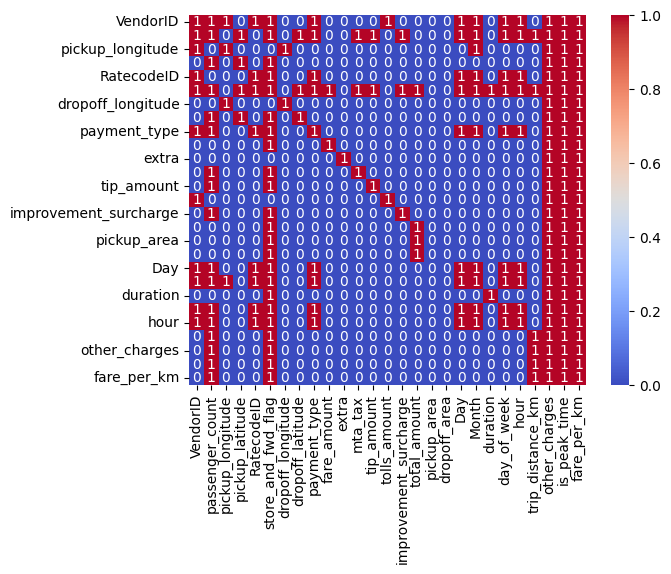

In [ ]:
import seaborn as sns
#heatmap analysis for better visualisation of the stastical test results
sns.heatmap(final_df,annot=True,cmap="coolwarm")

In [ ]:
#INFERENCES:
#Though some columns showed minimal correlation, through statistical test we found it shows  significance.
# Thus we are going ahead without droping any columns

# Machine Learning

### Split Train/Test data

In [ ]:
# Features (exclude your target columns)
x = df.drop(columns=['other_charges', 'fare_per_km', 'fare_amount',
                     'total_amount', 'duration', 'tip_amount'])

# Targets (multiple outputs)
y = df[['other_charges', 'fare_per_km', 'fare_amount',
        'total_amount', 'duration', 'tip_amount']]


### Linear Regression(Multivariate)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.multioutput import MultiOutputRegressor
import pandas as pd

# -------------------------
# 1️⃣ Define your targets
# -------------------------
target_cols = ['other_charges', 'fare_per_km', 'fare_amount',
               'total_amount', 'duration', 'tip_amount']

X = df.drop(columns=target_cols)
Y = df[target_cols]

# -------------------------
# 2️⃣ Train/test split
# -------------------------
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# -------------------------
# 3️⃣ Train model
# -------------------------
model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, Y_train)

# -------------------------
# 4️⃣ Predictions
# -------------------------
y_pred = model.predict(X_test)
y_pred_df = pd.DataFrame(y_pred, columns=target_cols, index=Y_test.index)

# -------------------------
# 5️⃣ Evaluation metrics per target
# -------------------------
metrics = []
for col in target_cols:
    y_true = Y_test[col]
    y_hat = y_pred_df[col]
    r2 = r2_score(y_true, y_hat)
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_hat)
    metrics.append([col, r2, mse, rmse, mae])

metrics_df = pd.DataFrame(metrics, columns=['Target', 'R2', 'MSE', 'RMSE', 'MAE'])
print(metrics_df)


          Target        R2          MSE       RMSE        MAE
0  other_charges  0.624189     0.901323   0.949380   0.598676
1    fare_per_km  0.098097  3745.480006  61.200327  16.579869
2    fare_amount  0.605754     0.153246   0.391467   0.259758
3   total_amount  0.624899     0.191450   0.437550   0.292062
4       duration  0.196637   602.572607  24.547354   9.022180
5     tip_amount  0.553467     0.901255   0.949345   0.598423


### XGBOOST Regressor (Multivariate)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor

# -------------------------
# 1️⃣ Define your targets
# -------------------------
target_cols = ['other_charges', 'fare_per_km', 'fare_amount',
               'total_amount', 'duration', 'tip_amount']

X = df.drop(columns=target_cols)
Y = df[target_cols]

# -------------------------
# 2️⃣ Train/test split
# -------------------------
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# -------------------------
# 3️⃣ Train XGBoost multi-output model
# -------------------------
xgb_model = MultiOutputRegressor(
    XGBRegressor(
        n_estimators=200,      # boosting rounds
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=1.0,
        random_state=42,
        n_jobs=-1
    )
)
xgb_model.fit(X_train, Y_train)

# -------------------------
# 4️⃣ Predictions
# -------------------------
y_pred = xgb_model.predict(X_test)
y_pred_df = pd.DataFrame(y_pred, columns=target_cols, index=Y_test.index)

# -------------------------
# 5️⃣ Evaluation metrics per target
# -------------------------
metrics = []
for col in target_cols:
    y_true = Y_test[col]
    y_hat = y_pred_df[col]
    r2 = r2_score(y_true, y_hat)
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_hat)
    metrics.append([col, r2, mse, rmse, mae])

metrics_df = pd.DataFrame(metrics, columns=['Target', 'R2', 'MSE', 'RMSE', 'MAE'])

# -------------------------
# 6️⃣ Results
# -------------------------
print(metrics_df)


          Target        R2          MSE       RMSE       MAE
0  other_charges  0.718263     0.675702   0.822011  0.425386
1    fare_per_km -0.030037  4277.601303  65.403374  3.486258
2    fare_amount  0.826560     0.067417   0.259649  0.168812
3   total_amount  0.833290     0.085088   0.291698  0.193238
4       duration  0.246747   564.986576  23.769446  7.267625
5     tip_amount  0.672214     0.661584   0.813378  0.424569


### Random Forest (Multivariate)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

# -------------------------
# 1️⃣ Define your targets
# -------------------------
target_cols = ['other_charges', 'fare_per_km', 'fare_amount',
               'total_amount', 'duration', 'tip_amount']

X = df.drop(columns=target_cols)
Y = df[target_cols]

# -------------------------
# 2️⃣ Train/test split
# -------------------------
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# -------------------------
# 3️⃣ Fast baseline Random Forest
# -------------------------
rf = RandomForestRegressor(
    n_estimators=100,     # small number of trees
    max_depth=10,         # limit depth for speed
    random_state=42,
    n_jobs=-1
)

multi_rf = MultiOutputRegressor(rf)
multi_rf.fit(X_train, Y_train)

# -------------------------
# 4️⃣ Predictions
# -------------------------
y_pred = multi_rf.predict(X_test)
y_pred_df = pd.DataFrame(y_pred, columns=target_cols, index=Y_test.index)

# -------------------------
# 5️⃣ Evaluation metrics
# -------------------------
metrics = []
for col in target_cols:
    y_true = Y_test[col]
    y_hat = y_pred_df[col]
    r2 = r2_score(y_true, y_hat)
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    metrics.append([col, r2, mse, rmse, mae])

metrics_df = pd.DataFrame(metrics, columns=['Target', 'R2', 'MSE', 'RMSE','MAE'])
print(metrics_df)


          Target        R2          MSE       RMSE       MAE
0  other_charges  0.678218     0.771743   0.878489  0.424569
1    fare_per_km  0.438084  2333.560777  48.306943  0.424569
2    fare_amount  0.776511     0.086872   0.294741  0.424569
3   total_amount  0.784870     0.109801   0.331363  0.424569
4       duration  0.211326   591.554884  24.321901  0.424569
5     tip_amount  0.625962     0.754936   0.868870  0.424569


### SVR (MultiVariate)

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

target_cols = ['other_charges', 'fare_per_km', 'fare_amount',
               'total_amount', 'duration', 'tip_amount']

X = df.drop(columns=target_cols)
Y = df[target_cols]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

svr_model = MultiOutputRegressor(SVR(kernel='rbf', C=10, gamma='scale', max_iter=500))
svr_model.fit(X_train, Y_train)
y_pred = svr_model.predict(X_test)

metrics = []
for i, col in enumerate(target_cols):
    r2 = r2_score(Y_test[col], y_pred[:, i])
    mse = mean_squared_error(Y_test[col], y_pred[:, i])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test[col], y_pred[:, i])
    metrics.append(["SVR", col, r2, mse, rmse, mae])

metrics_df = pd.DataFrame(metrics, columns=['Model', 'Target', 'R2', 'MSE', 'RMSE', 'MAE'])
print(metrics_df)


  Model         Target         R2          MSE       RMSE        MAE
0   SVR  other_charges  -3.613596    11.064981   3.326407   2.773548
1   SVR    fare_per_km  -0.015487  4217.179985  64.939818  12.375338
2   SVR    fare_amount -55.222394    21.854077   4.674834   4.617358
3   SVR   total_amount -51.104143    26.593709   5.156909   5.110406
4   SVR       duration  -0.000742   750.619365  27.397434  14.066822
5   SVR     tip_amount  -0.074338     2.168378   1.472541   1.097297


### Ridge Regressor (Multivariate)

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

target_cols = ['other_charges', 'fare_per_km', 'fare_amount',
               'total_amount', 'duration', 'tip_amount']

X = df.drop(columns=target_cols)
Y = df[target_cols]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

ridge_model = MultiOutputRegressor(Ridge(alpha=1.0, max_iter=500))
ridge_model.fit(X_train, Y_train)
y_pred = ridge_model.predict(X_test)

metrics = []
for i, col in enumerate(target_cols):
    r2 = r2_score(Y_test[col], y_pred[:, i])
    mse = mean_squared_error(Y_test[col], y_pred[:, i])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test[col], y_pred[:, i])
    metrics.append(["Ridge", col, r2, mse, rmse, mae])

metrics_df = pd.DataFrame(metrics, columns=['Model', 'Target', 'R2', 'MSE', 'RMSE', 'MAE'])
print(metrics_df)


   Model         Target        R2          MSE       RMSE        MAE
0  Ridge  other_charges  0.624276     0.901115   0.949271   0.598606
1  Ridge    fare_per_km  0.105073  3716.510479  60.963190  16.663905
2  Ridge    fare_amount  0.607294     0.152648   0.390702   0.259891
3  Ridge   total_amount  0.626137     0.190818   0.436827   0.292165
4  Ridge       duration  0.196632   602.576267  24.547429   9.022085
5  Ridge     tip_amount  0.553513     0.901163   0.949296   0.598379


### Choosing Best Model

| Target         | Best Model    | Notes                                          |
| -------------- | ------------- | ---------------------------------------------- |
| other\_charges | XGBoost       | Highest R² and lowest error                    |
| fare\_per\_km  | Random Forest | Only model with decent R²; tune to improve MAE |
| fare\_amount   | XGBoost       | Highest R², lowest error                       |
| total\_amount  | XGBoost       | Highest R², lowest error                       |
| duration       | XGBoost       | Slightly better but all weak                   |
| tip\_amount    | XGBoost       | Highest R² and lowest error                    |


In [ ]:
# So on the whole we can choose XGBoost as our best model

## Pickling

In [ ]:
# import pickle

# with open('xgb_multioutput_model.pkl', 'wb') as f:
#     pickle.dump(xgb_model, f)

# print("XGBoost model saved as 'xgb_multioutput_model.pkl'")


In [ ]:
# import pandas as pd
# df = pd.read_csv("/content/drive/MyDrive/taxi_fare_with_areas.csv")
# df.columns

In [ ]:
X_train.columns

Index(['VendorID', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'RatecodeID', 'store_and_fwd_flag', 'dropoff_longitude',
       'dropoff_latitude', 'payment_type', 'extra', 'mta_tax', 'tolls_amount',
       'improvement_surcharge', 'pickup_area', 'dropoff_area', 'Day', 'Month',
       'day_of_week', 'hour', 'trip_distance_km', 'is_peak_time'],
      dtype='object')

In [ ]:
df['payment_type'].unique()

array([1, 2, 3, 4])

In [ ]:
import geopandas as gpd

gdf = gpd.read_file('/content/NYC_NTA.geojson')
print(gdf.columns)


Index(['shape_area', 'ntaname', 'cdtaname', 'shape_leng', 'boroname',
       'ntatype', 'nta2020', 'borocode', 'countyfips', 'ntaabbrev', 'cdta2020',
       'geometry'],
      dtype='object')


In [ ]:
gdf

,shape_area,ntaname,cdtaname,shape_leng,boroname,ntatype,nta2020,borocode,countyfips,ntaabbrev,cdta2020,geometry
0,35321809.1041,Greenpoint,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28919.5608108,Brooklyn,0,BK0101,3,047,Grnpt,BK01,"MULTIPOLYGON (((-73.93213 40.72816, -73.93238 ..."
1,28852852.7038,Williamsburg,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28134.0823238,Brooklyn,0,BK0102,3,047,Wllmsbrg,BK01,"MULTIPOLYGON (((-73.95814 40.7244, -73.95772 4..."
2,15208960.7339,South Williamsburg,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),18250.2805432,Brooklyn,0,BK0103,3,047,SWllmsbrg,BK01,"MULTIPOLYGON (((-73.95024 40.70547, -73.94984 ..."
3,52267407.9898,East Williamsburg,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),43184.7989883,Brooklyn,0,BK0104,3,047,EWllmsbrg,BK01,"MULTIPOLYGON (((-73.92406 40.71411, -73.92404 ..."
4,9982321.59069,Brooklyn Heights,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,14312.5049745,Brooklyn,0,BK0201,3,047,BkHts,BK02,"MULTIPOLYGON (((-73.99236 40.68969, -73.99436 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
257,47758768.0799,Freshkills Park (South),SI03 South Shore (CD 3 Approximation),33945.4204211,Staten Island,9,SI0391,5,085,FrshklPK_S,SI03,"MULTIPOLYGON (((-74.20058 40.57951, -74.19888 ..."
258,9867248.986,Fort Wadsworth,SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...,14814.4147411,Staten Island,6,SI9561,5,085,FtWdswrth,SI95,"MULTIPOLYGON (((-74.05975 40.59385, -74.06013 ..."
259,635701.967583,Hoffman & Swinburne Islands,SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...,4743.12812675,Staten Island,9,SI9591,5,085,HffmnIsl,SI95,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
260,10866804.1436,Miller Field,SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...,19197.2009732,Staten Island,9,SI9592,5,085,MllrFld,SI95,"MULTIPOLYGON (((-74.08469 40.57148, -74.08595 ..."
